# exploratory data analysis

In [1]:
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from stop_words import get_stop_words

plt.rcParams['figure.figsize'] = (17.0, 7.0)
stop_words = get_stop_words('english')
training_data_filepath = '../data/raw/trainSet.csv'

In [2]:
!ls ../data/raw

candidateTestSet.csv trainSet.csv


In [3]:
known_queries = pd.read_csv(training_data_filepath, header=None, names=['query', 'category'])
known_queries.sample(5)

,query,category
96108,3m reflective tape,770
431849,change management curve,64
368212,packexe,770
216248,bicycle exercise,1011
160909,magnetic van signs,811


In [4]:
known_queries['word_list']  = known_queries['query'].str.split()
known_queries['word_count'] = known_queries['word_list'].apply(len)
known_queries.sample(5)

,query,category,word_list,word_count
392492,apana water bottle,752,"[apana, water, bottle]",3
21150,crawling aids,690,"[crawling, aids]",2
504911,football bounce net,267,"[football, bounce, net]",3
255892,uncontested divorce,1088,"[uncontested, divorce]",2
134653,ski norway,346,"[ski, norway]",2


In [5]:
category_labels = sorted(known_queries['category'].unique())
print('there are', len(category_labels), 'categories, labelled from', category_labels[0:2], '...', category_labels[-2:])

there are 1419 categories, labelled from [0, 1] ... [1417, 1418]


In [6]:
print('the smallest classes have', sorted(known_queries['category'].value_counts())[0:5], 'records')
query_counts = \
    known_queries\
    .groupby(by='category')\
    .agg({'query':'count'})\
    .rename(columns={'query':'num_queries'})
display(query_counts.sample(3))
display(query_counts.describe())

the smallest classes have [4, 10, 14, 14, 16] records


,num_queries
category,
693,462
1175,585
1077,593


,num_queries
count,1419.000000
mean,427.641297
std,128.526016
min,4.000000
25%,338.500000
50%,461.000000
75%,530.000000
max,623.000000


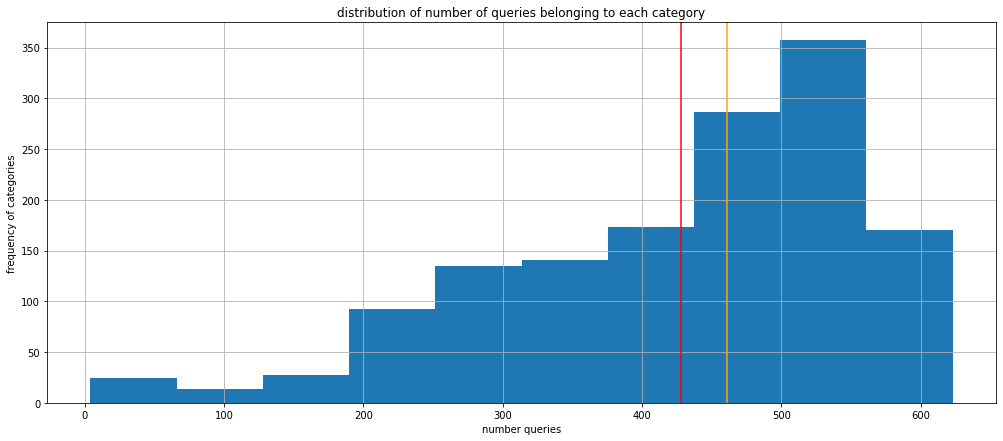

In [7]:
query_counts.hist()
plt.title('distribution of number of queries belonging to each category')
plt.axvline(x=np.mean(query_counts['num_queries']), color='red')
plt.axvline(x=np.median(query_counts['num_queries']), color='orange')
plt.xlabel('number queries')
plt.ylabel('frequency of categories')
plt.savefig('../graphs/distribution_numqueries.png')
plt.show();

In [8]:
%%time
known_queries['query_padded'] = known_queries['query'].apply(lambda q: q+' ')
query_terms = \
    known_queries\
    .groupby(by='category')\
    .agg({'query_padded':'sum'})\
    .rename(columns={'query_padded':'combined'})
query_terms['all_terms'] = query_terms['combined'].str.split()
query_terms['nonstop_terms'] = query_terms['all_terms'].apply(lambda allterms: [term for term in allterms if term not in stop_words])
query_terms['term_frequency'] = query_terms['nonstop_terms'].apply(Counter)
query_terms['top_terms'] = query_terms['term_frequency'].apply(lambda adict: sorted(adict, key=adict.get, reverse=True)[:10])
query_terms['deduplicated_terms'] = query_terms['nonstop_terms'].apply(set)
query_terms['num_terms'] = query_terms['deduplicated_terms'].apply(len)
display(query_terms.sample(5))

,combined,all_terms,nonstop_terms,term_frequency,top_terms,deduplicated_terms,num_terms
category,,,,,,,
1204,mixing bowl gyoza wrappers slow cooker with ti...,"[mixing, bowl, gyoza, wrappers, slow, cooker, ...","[mixing, bowl, gyoza, wrappers, slow, cooker, ...","{'mixing': 1, 'bowl': 1, 'gyoza': 1, 'wrappers...","[recipes, knife, healthy, chopping, vegan, slo...","{grill, flavours, red, fruit, parmesan, women,...",340
94,wisdens for sale international football result...,"[wisdens, for, sale, international, football, ...","[wisdens, sale, international, football, resul...","{'wisdens': 3, 'sale': 9, 'international': 3, ...","[football, live, today, scoreboard, score, cri...","{vtech, klaipedoje, roland, 3ex, 50hd, timing,...",488
1315,spray painting furniture paint sale laminate p...,"[spray, painting, furniture, paint, sale, lami...","[spray, painting, furniture, paint, sale, lami...","{'spray': 12, 'painting': 39, 'furniture': 8, ...","[paint, painting, wood, exterior, b&q, decorat...","{grain, sloan, mauve, brick, edging, dough, co...",286
687,let alliance credit check how to improve credi...,"[let, alliance, credit, check, how, to, improv...","[let, alliance, credit, check, improve, credit...","{'let': 1, 'alliance': 1, 'credit': 394, 'chec...","[credit, score, check, free, uk, rating, repor...","{affect, quick, pass, good, top, reference, da...",190
482,g shock watches uk skagen watches men disney j...,"[g, shock, watches, uk, skagen, watches, men, ...","[g, shock, watches, uk, skagen, watches, men, ...","{'g': 3, 'shock': 2, 'watches': 113, 'uk': 15,...","[watches, watch, mens, ladies, gold, uk, tag, ...","{marc, prc, boss, dial, led, womens, ingersoll...",269


CPU times: user 5.28 s, sys: 105 ms, total: 5.38 s
Wall time: 5.41 s


In [9]:
# are the categories sensible?
pd.options.display.max_colwidth = 200
display(query_terms['top_terms'].sample(10))

category
974                        [book, dvd, poster, black, books, scarface, fiction, swan, pulp, south]
1196                  [foundation, best, primer, concealer, makeup, uk, skin, max, factor, powder]
462                 [cake, cream, ice, birthday, cakes, cupcake, wedding, cupcakes, free, toppers]
1301                      [hair, dye, shampoo, ghd, wigs, dryer, uk, straighteners, brush, colour]
45         [pension, financial, advisor, budget, uk, advice, mortgage, probate, money, calculator]
277             [garden, furniture, table, rattan, chairs, cushions, outdoor, argos, patio, bench]
453     [epilepsy, seizures, seizure, adults, uk, epileptic, treatment, symptoms, insurance, dogs]
878       [construction, software, companies, building, estimating, cost, much, uk, template, per]
326                                 [navy, hms, royal, list, crew, model, submarine, sale, 1, usn]
864                       [machine, maker, candy, floss, popcorn, uk, slush, sale, hire, catering]
N

In [10]:
query_terms.to_csv('../data/processed/category_summary.csv')

In [11]:
pd.options.display.max_colwidth = 200
display(query_terms['combined'].sample())

category
817    fiora trays cooking fuel steel baking tray lincat silverlink 600 bain marie chafer gel fuel steel radiators uk lincat bain marie gel fuel for fondue steel bowl bain marie inserts truka heat diffus...
Name: combined, dtype: object

In [12]:
!pwd

/Users/oh/work/search_term_classification/notebooks


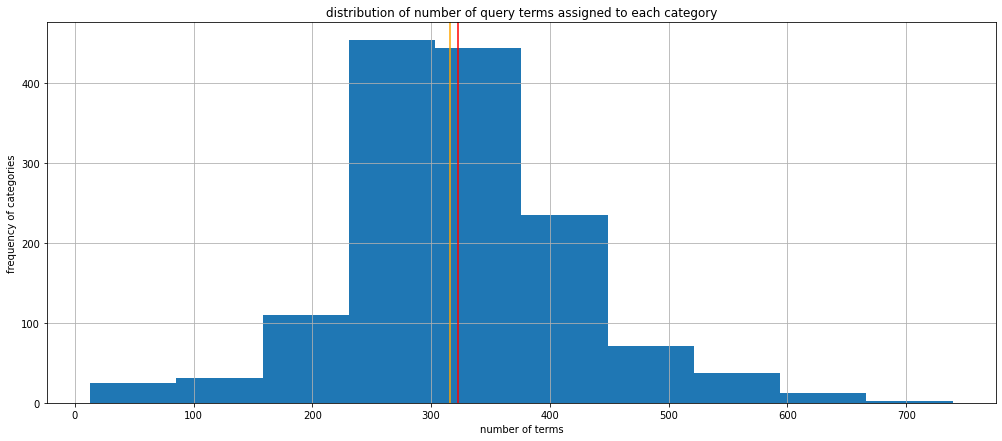

In [13]:
query_terms['num_terms'].hist()
plt.title('distribution of number of query terms assigned to each category')
plt.axvline(x=np.mean(query_terms['num_terms']), color='red')
plt.axvline(x=np.median(query_terms['num_terms']), color='orange')
plt.xlabel('number of terms')
plt.ylabel('frequency of categories')
plt.savefig('../graphs/distribution_numterms.png')
plt.show();

In [14]:
minority_categories = query_counts[query_counts['num_queries']<25] # very few queries make it hard to learn patterns
minority_categories = sorted(minority_categories.index)
# known_queries[known_queries['category'] in minority_queries]

In [15]:
mask = [True if (category in minority_categories) else False for category in known_queries['category'] ]
minority_queries = known_queries[mask]
# minority_queries.head(5)

In [16]:
# verify whether minority classes are coherent:
for category in minority_categories:
    just_category = minority_queries[minority_queries['category']==category]
    num_queries = len(just_category)
    print('-'*30)
    print('minority category', category, 'has', num_queries, 'queries, including:')
    display(just_category.sample(min(10,num_queries)))

------------------------------
minority category 173 has 16 queries, including:


,query,category,word_list,word_count,query_padded
268007,acer revo nettop,173,"[acer, revo, nettop]",3,acer revo nettop
452831,pny powerpack t5200 review,173,"[pny, powerpack, t5200, review]",4,pny powerpack t5200 review
31229,revo rl70,173,"[revo, rl70]",2,revo rl70
437192,mt34,173,[mt34],1,mt34
535647,ez usb,173,"[ez, usb]",2,ez usb
421245,topeak mobile powerpack 5200mah,173,"[topeak, mobile, powerpack, 5200mah]",4,topeak mobile powerpack 5200mah
57336,pny powerpack 5200 review,173,"[pny, powerpack, 5200, review]",4,pny powerpack 5200 review
355783,pny 5200 powerpack,173,"[pny, 5200, powerpack]",3,pny 5200 powerpack
439285,medion life phone,173,"[medion, life, phone]",3,medion life phone
526054,pny t2600,173,"[pny, t2600]",2,pny t2600


------------------------------
minority category 554 has 14 queries, including:


,query,category,word_list,word_count,query_padded
561278,investments landg com,554,"[investments, landg, com]",3,investments landg com
20116,legal and general investments address,554,"[legal, and, general, investments, address]",5,legal and general investments address
561551,legal and general investments contact,554,"[legal, and, general, investments, contact]",5,legal and general investments contact
331897,general and legal life insurance,554,"[general, and, legal, life, insurance]",5,general and legal life insurance
135853,www legalandgeneral com investments,554,"[www, legalandgeneral, com, investments]",4,www legalandgeneral com investments
26369,legal general,554,"[legal, general]",2,legal general
356054,rechtsschutzversicherung vergleich,554,"[rechtsschutzversicherung, vergleich]",2,rechtsschutzversicherung vergleich
463572,ppl lawyers,554,"[ppl, lawyers]",2,ppl lawyers
392890,caribsea arag alive,554,"[caribsea, arag, alive]",3,caribsea arag alive
455823,legalandgeneral com investments,554,"[legalandgeneral, com, investments]",3,legalandgeneral com investments


------------------------------
minority category 587 has 4 queries, including:


,query,category,word_list,word_count,query_padded
143201,fintech big data,587,"[fintech, big, data]",3,fintech big data
333393,innovation in financial services,587,"[innovation, in, financial, services]",4,innovation in financial services
124007,client onboarding investment banking,587,"[client, onboarding, investment, banking]",4,client onboarding investment banking
373542,m commerce uk,587,"[m, commerce, uk]",3,m commerce uk


------------------------------
minority category 615 has 19 queries, including:


,query,category,word_list,word_count,query_padded
404718,rowing oars,615,"[rowing, oars]",2,rowing oars
77252,inflatable kayak,615,"[inflatable, kayak]",2,inflatable kayak
209552,ships for sale,615,"[ships, for, sale]",3,ships for sale
108209,boats for sale,615,"[boats, for, sale]",3,boats for sale
107455,boat paint,615,"[boat, paint]",2,boat paint
7876,sailing dinghy for sale,615,"[sailing, dinghy, for, sale]",4,sailing dinghy for sale
77146,mirror dinghy,615,"[mirror, dinghy]",2,mirror dinghy
452001,tall ships 2017,615,"[tall, ships, 2017]",3,tall ships 2017
197234,fishing boats for sale uk,615,"[fishing, boats, for, sale, uk]",5,fishing boats for sale uk
379010,laser boat,615,"[laser, boat]",2,laser boat


------------------------------
minority category 619 has 17 queries, including:


,query,category,word_list,word_count,query_padded
374077,nuka cola quantum drink,619,"[nuka, cola, quantum, drink]",4,nuka cola quantum drink
420223,quantum cola,619,"[quantum, cola]",2,quantum cola
200818,nuka cola quantum label,619,"[nuka, cola, quantum, label]",4,nuka cola quantum label
521961,coral joining bonus,619,"[coral, joining, bonus]",3,coral joining bonus
233726,bard flip flo,619,"[bard, flip, flo]",3,bard flip flo
508552,nuka cola quantum,619,"[nuka, cola, quantum]",3,nuka cola quantum
233014,gnr monitor,619,"[gnr, monitor]",2,gnr monitor
62170,gendarme hat,619,"[gendarme, hat]",2,gendarme hat
577900,gnr merchandise,619,"[gnr, merchandise]",2,gnr merchandise
536722,nuka cola quantum lamp,619,"[nuka, cola, quantum, lamp]",4,nuka cola quantum lamp


------------------------------
minority category 826 has 10 queries, including:


,query,category,word_list,word_count,query_padded
499810,mft file transfer,826,"[mft, file, transfer]",3,mft file transfer
321020,recommend a good book,826,"[recommend, a, good, book]",4,recommend a good book
141516,sage x3 consultant,826,"[sage, x3, consultant]",3,sage x3 consultant
149090,beko engineering,826,"[beko, engineering]",2,beko engineering
190202,cv consultant london,826,"[cv, consultant, london]",3,cv consultant london
510599,learn informatica,826,"[learn, informatica]",2,learn informatica
545309,consultant informatique,826,"[consultant, informatique]",2,consultant informatique
343792,informatica pricing,826,"[informatica, pricing]",2,informatica pricing
424474,informatica,826,[informatica],1,informatica
208824,informatica consultant,826,"[informatica, consultant]",2,informatica consultant


------------------------------
minority category 865 has 23 queries, including:


,query,category,word_list,word_count,query_padded
391292,consumer rights used cars uk,865,"[consumer, rights, used, cars, uk]",5,consumer rights used cars uk
419773,damaged box goods,865,"[damaged, box, goods]",3,damaged box goods
180824,trading standards car warranty,865,"[trading, standards, car, warranty]",4,trading standards car warranty
272334,return to invoice gap insurance quote,865,"[return, to, invoice, gap, insurance, quote]",6,return to invoice gap insurance quote
514837,putting a deposit on a used car,865,"[putting, a, deposit, on, a, used, car]",7,putting a deposit on a used car
497873,what are my rights on faulty goods,865,"[what, are, my, rights, on, faulty, goods]",7,what are my rights on faulty goods
223070,vehicle defect books,865,"[vehicle, defect, books]",3,vehicle defect books
453124,gap insurance return to invoice,865,"[gap, insurance, return, to, invoice]",5,gap insurance return to invoice
192341,consumer legal advice,865,"[consumer, legal, advice]",3,consumer legal advice
419985,sold a faulty car,865,"[sold, a, faulty, car]",4,sold a faulty car


------------------------------
minority category 1105 has 21 queries, including:


,query,category,word_list,word_count,query_padded
149889,singing balloons uk,1105,"[singing, balloons, uk]",3,singing balloons uk
94519,wedding telegrams,1105,"[wedding, telegrams]",2,wedding telegrams
139101,telegram service uk,1105,"[telegram, service, uk]",3,telegram service uk
217323,send a telegram uk,1105,"[send, a, telegram, uk]",4,send a telegram uk
536688,gram k400,1105,"[gram, k400]",2,gram k400
14652,sing birthday cards,1105,"[sing, birthday, cards]",3,sing birthday cards
327496,the beach club resort parksville,1105,"[the, beach, club, resort, parksville]",5,the beach club resort parksville
246594,singing birthday,1105,"[singing, birthday]",2,singing birthday
586219,telegram free,1105,"[telegram, free]",2,telegram free
316611,uk telegram service,1105,"[uk, telegram, service]",3,uk telegram service


------------------------------
minority category 1309 has 14 queries, including:


,query,category,word_list,word_count,query_padded
604995,bedroom tax exemptions over 60,1309,"[bedroom, tax, exemptions, over, 60]",5,bedroom tax exemptions over 60
477233,british army volunteer,1309,"[british, army, volunteer]",3,british army volunteer
208752,who is exempt from paying bedroom tax,1309,"[who, is, exempt, from, paying, bedroom, tax]",7,who is exempt from paying bedroom tax
55065,whos exempt from bedroom tax,1309,"[whos, exempt, from, bedroom, tax]",5,whos exempt from bedroom tax
465531,jw stuff,1309,"[jw, stuff]",2,jw stuff
82833,why should people volunteer,1309,"[why, should, people, volunteer]",4,why should people volunteer
375177,polish army tent,1309,"[polish, army, tent]",3,polish army tent
428730,polish army hat,1309,"[polish, army, hat]",3,polish army hat
509552,who is exempt from bedroom tax,1309,"[who, is, exempt, from, bedroom, tax]",6,who is exempt from bedroom tax
388563,national interpreter service,1309,"[national, interpreter, service]",3,national interpreter service


In [17]:
# from a glance of the above, these entries are misclassified, and could be ignored
misclassified_idx = [
    166062,
    392890,
    327496,
]

In [18]:
%%time
word_categories = defaultdict(set)
word_frequency  = defaultdict(lambda: 0)
for index, row in known_queries.iterrows():
    for word in row['word_list']:
        word_categories[word].add(row['category'])
        word_frequency[word] += 1

CPU times: user 46.4 s, sys: 149 ms, total: 46.5 s
Wall time: 46.6 s


In [19]:
print('labelled data has', len(word_categories), 'unique terms')
random_key = random.sample(list(word_categories.keys()), 5)
for key in random_key:
    print('"'+key+'" occurs', word_frequency[key], 'categories')

labelled data has 70172 unique terms
"bobin" occurs 1 categories
"h9" occurs 1 categories
"w273s" occurs 1 categories
"3304" occurs 1 categories
"havdalah" occurs 1 categories


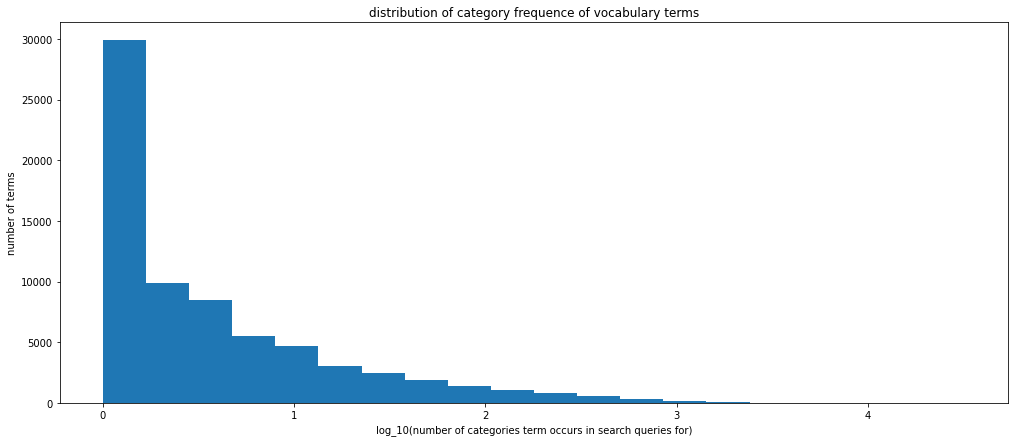

In [21]:
plt.hist(np.log10(sorted(word_frequency.values())), bins=20)
plt.title('distribution of category frequence of vocabulary terms')
plt.xlabel('log_10(number of categories term occurs in search queries for)')
plt.ylabel('number of terms')
plt.savefig('../graphs/distribution_category_frequency_of_terms')
plt.show()

we can see that the vast majority of the terms in the vocabulary occur in fewer than 10 categories (position 1.0 on the x axis in the barplot above.)

this is good, it means the terms are generally descriptive of their category. only a very few terms occur in thousands of  (past position 3.0 on the x axis). those terms (including 'birthday') are not useful for determining the category of a query.

In [30]:
meaningless_terms = [
    term for term, number_of_categories in word_frequency.items() if (number_of_categories > 1000) 
]
print(len(meaningless_terms), 'meaningless terms:', meaningless_terms)

252 meaningless terms: ['fire', 'shop', 'cheap', 'for', 'sale', 'uk', 'gold', 'buy', 'tickets', 'bed', 'grey', 'and', 'in', 'car', 'of', 'from', 'cruises', 'spa', 'deals', 'gifts', 'property', 'bank', 'ski', 'tesco', 'school', 'shirt', 'men', 'reviews', 'how', 'to', 'get', 'a', 'free', 'kitchen', 'womens', 'alarm', 'over', 'small', 'new', 'book', 'insurance', 'do', 'white', 'delivery', 'hire', 'plastic', 'machine', 'ice', 'repair', 'food', 'the', 'shoes', 'wedding', 'set', 'mens', 'jacket', 'card', 'adidas', 'paint', 'mini', 'paper', 'cd', 'john', 'lewis', 'up', 'london', 'golf', 'tv', 'long', 'black', 'dress', 'course', 'test', 'jobs', 'kit', 'software', 'gift', 'york', 'review', 'life', 'art', 'removal', 'glass', 'me', 'clock', 'online', 'amazon', 'what', 'on', '3', 'carpet', 'cleaning', 'dresses', 'number', 'phone', 'large', 'hair', 'houses', 'face', 'is', 'spray', 'girls', 'price', 'at', 'mask', 'hand', 'health', 'check', 'world', 'with', 'much', 'cost', 'christmas', 'business', 'c

In [23]:
meaningful_terms = [
    term for term, number_of_categories in word_frequency.items() if (number_of_categories < 5) 
]
print(len(meaningful_terms), 'term are meaningful, including:', random.sample(meaningful_terms,10))

48171 term are meaningful, including: ['pixar', 'bellevue', 'abb', 'lifespan', 'ferrybridge', 'grundy', 'denso', 'mathcad', 'rx7', 'rsagroup']


In [24]:
# does our vocabulary have decent coverage, considering the use case?
new_queries = pd.read_csv('../data/raw/candidateTestSet.csv', header=None, names=['query'])
display(new_queries.sample(3))
print('there are', len(new_queries), 'new search queries to classify')

,query
41223,liquid thc
12612,glitter feature wall
63903,iso26262


there are 67424 new search queries to classify


In [25]:
new_queries['word_list'] = new_queries['query'].str.split()
new_queries.sample(3)

,query,word_list
43864,k 70,"[k, 70]"
64985,health and safety consultants essex,"[health, and, safety, consultants, essex]"
58131,calendar maker,"[calendar, maker]"


In [26]:
%%time 
new_word_frequency = defaultdict(lambda: 0)
for index, row in new_queries.iterrows():
    for word in row['word_list']:
        new_word_frequency[word] += 1
print('test data has', len(new_word_frequency), 'words')
random_key = random.sample(list(new_word_frequency.keys()), 5)
for key in random_key:
    print('"'+key+'" occurs', new_word_frequency[key], 'times')

test data has 25777 words
"mclean" occurs 1 times
"heelers" occurs 1 times
"new" occurs 415 times
"pinup" occurs 1 times
"hoburne" occurs 3 times
CPU times: user 4.4 s, sys: 15.2 ms, total: 4.41 s
Wall time: 4.42 s


In [27]:
known_words = set(word_frequency.keys())
new_words = set(new_word_frequency.keys())
all_words = known_words.union(new_words)
in_common_words = new_words.intersection(known_words)
new_only = new_words.difference(known_words)

num_known = len(known_words)
num_new = len(new_words)
num_all_words = len(all_words)
num_common = len(in_common_words)
num_new_only = len(new_only)

print('there are', len(known_words), 'unique known words and', len(new_words), 'new words')
print('there are a total of', num_all_words, 'words')
print('there are', num_common, 'words in common', round(100*num_common/num_new,2),'%' )
print('there are', num_new_only, 'words in the unlabelled queries not found in the labelled queries')
print('example unseen words', random.sample(new_only,5))

there are 70172 unique known words and 25777 new words
there are a total of 73619 words
there are 22330 words in common 86.63 %
there are 3447 words in the unlabelled queries not found in the labelled queries
example unseen words ['assure', 'optionfair', 'entering', 'amsons', 'propertytransaction']


In [28]:
print('example unseen words', random.sample(new_only,5))

example unseen words ['captivating', 'jaxx', 'durkin', 'milgram', 'mokkers']


In [29]:
%%time
known_queries['query_padded'] = known_queries['query'].apply(lambda q: q+' ')
query_terms = \
    known_queries\
    .groupby(by='category')\
    .agg({'query_padded':'sum'})\
    .rename(columns={'query_padded':'combined'})
query_terms['all_terms'] = query_terms['combined'].str.split()
query_terms['nonstop_terms'] = query_terms['all_terms'].apply(lambda allterms: [term for term in allterms if term not in stop_words])
query_terms['term_frequency'] = query_terms['nonstop_terms'].apply(Counter)
query_terms['top_terms'] = query_terms['term_frequency'].apply(lambda adict: sorted(adict, key=adict.get, reverse=True)[:10])
query_terms['deduplicated_terms'] = query_terms['nonstop_terms'].apply(set)
query_terms['num_terms'] = query_terms['deduplicated_terms'].apply(len)
query_terms.reset_index(level=0, inplace=True)
display(query_terms.sample(5))

,category,combined,all_terms,nonstop_terms,term_frequency,top_terms,deduplicated_terms,num_terms
698,698,harley quinn top avengers tower superman badge new mutants 98 marvel comic books batman beyond gotham marvel baby batman gadgets marvel graphic novel collection joker fancy dress spider man 2 game...,"[harley, quinn, top, avengers, tower, superman, badge, new, mutants, 98, marvel, comic, books, batman, beyond, gotham, marvel, baby, batman, gadgets, marvel, graphic, novel, collection, joker, fan...","[harley, quinn, top, avengers, tower, superman, badge, new, mutants, 98, marvel, comic, books, batman, beyond, gotham, marvel, baby, batman, gadgets, marvel, graphic, novel, collection, joker, fan...","{'harley': 17, 'quinn': 17, 'top': 7, 'avengers': 18, 'tower': 2, 'superman': 15, 'badge': 1, 'new': 6, 'mutants': 1, '98': 1, 'marvel': 83, 'comic': 17, 'books': 5, 'batman': 66, 'beyond': 2, 'go...","[marvel, batman, lego, deadpool, avengers, spiderman, harley, quinn, comic, superman]","{first, posters, top, endgame, wolverine, izombie, jean, arkham, one, superheroes, disney, shorts, red, justice, belt, america, armored, hand, clay, action, costume, doctor, light, steelbook, cosp...",266
1303,1303,cat rescue kent www bluecross org uk dogs trust dogs for rehoming free dogs for sale labradors for rehoming small dog rescue pet parade small dog rescue north west microchipping course bird rescue...,"[cat, rescue, kent, www, bluecross, org, uk, dogs, trust, dogs, for, rehoming, free, dogs, for, sale, labradors, for, rehoming, small, dog, rescue, pet, parade, small, dog, rescue, north, west, mi...","[cat, rescue, kent, www, bluecross, org, uk, dogs, trust, dogs, rehoming, free, dogs, sale, labradors, rehoming, small, dog, rescue, pet, parade, small, dog, rescue, north, west, microchipping, co...","{'cat': 40, 'rescue': 270, 'kent': 9, 'www': 1, 'bluecross': 1, 'org': 2, 'uk': 67, 'dogs': 83, 'trust': 2, 'rehoming': 53, 'free': 18, 'sale': 31, 'labradors': 2, 'small': 7, 'dog': 150, 'pet': 1...","[rescue, dog, dogs, uk, adopt, rehoming, cat, sale, animal, adoption]","{people, shepherd, sanctuary, vizsla, animals, homes, bristol, tears, persian, donkey, reviews, shelter, hampshire, cute, madriguera, fox, uk, cavalier, chance, ridgeback, east, collies, tzu, toys...",314
1116,1116,mizuno wave inspire 8 volleyball gifts volleyball kit mizuno ladies wave inspire mizuno wave enigma 2 mizuno wave hitogami 2 mizuno handball shoes mizuno wave drive 6 mizuno wave court shoes volle...,"[mizuno, wave, inspire, 8, volleyball, gifts, volleyball, kit, mizuno, ladies, wave, inspire, mizuno, wave, enigma, 2, mizuno, wave, hitogami, 2, mizuno, handball, shoes, mizuno, wave, drive, 6, m...","[mizuno, wave, inspire, 8, volleyball, gifts, volleyball, kit, mizuno, ladies, wave, inspire, mizuno, wave, enigma, 2, mizuno, wave, hitogami, 2, mizuno, handball, shoes, mizuno, wave, drive, 6, m...","{'mizuno': 92, 'wave': 62, 'inspire': 17, '8': 2, 'volleyball': 83, 'gifts': 1, 'kit': 3, 'ladies': 3, 'enigma': 6, '2': 6, 'hitogami': 5, 'handball': 2, 'shoes': 22, 'drive': 2, '6': 7, 'court': ...","[mizuno, volleyball, wave, shoes, uk, ankle, inspire, 18, ball, knee]","{zip, bola, stand, red, women, 19, mv12, gl7, mujin, badminton, wicked, alchemy, rucanor, model, kien, 15, veja, thermo, stopgap, uk, direct, australia, lok, netting, musha, professional, hoodie, ...",309
495,495,coconut matting the barcode warehouse price tag paper bag jewellerybox jewellery tree sabichi shopping trolley timesheet shop signs argos clothes rail worldpay uk vegetable basket coat rack plasti...,"[coconut, matting, the, barcode, warehouse, price, tag, paper, bag, jewellerybox, jewellery, tree, sabichi, shopping, trolley, timesheet, shop, signs, argos, clothes, rail, worldpay, uk, vegetable...","[coconut, matting, barcode, warehouse, price, tag, paper, bag, jewellerybox, jewellery, tree, sabichi, shopping, trolley, timesheet, shop, signs, argos, clothes, rail, worldpay, uk, vegetable, bas

CPU times: user 5.03 s, sys: 127 ms, total: 5.16 s
Wall time: 5.16 s
